# Voxelization Workshop

In this workshop we will learn how to voxelize a geometry and construct a lattice from it.


### 0. Initialization
Importing all necessary libraries and specifying the inputs

In [1]:
import os
import topogenesis as tg
import pyvista as pv
import trimesh as tm
import numpy as np

In [2]:
vs = 1.8
unit = [vs, vs, vs]
mesh_path = os.path.relpath('../data/compulsory_envelope.obj')

## 1. Input Mesh

In [3]:
# load the mesh from file
mesh = tm.load(mesh_path)
# Check if the mesh is watertight
print(mesh.is_watertight)

True


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

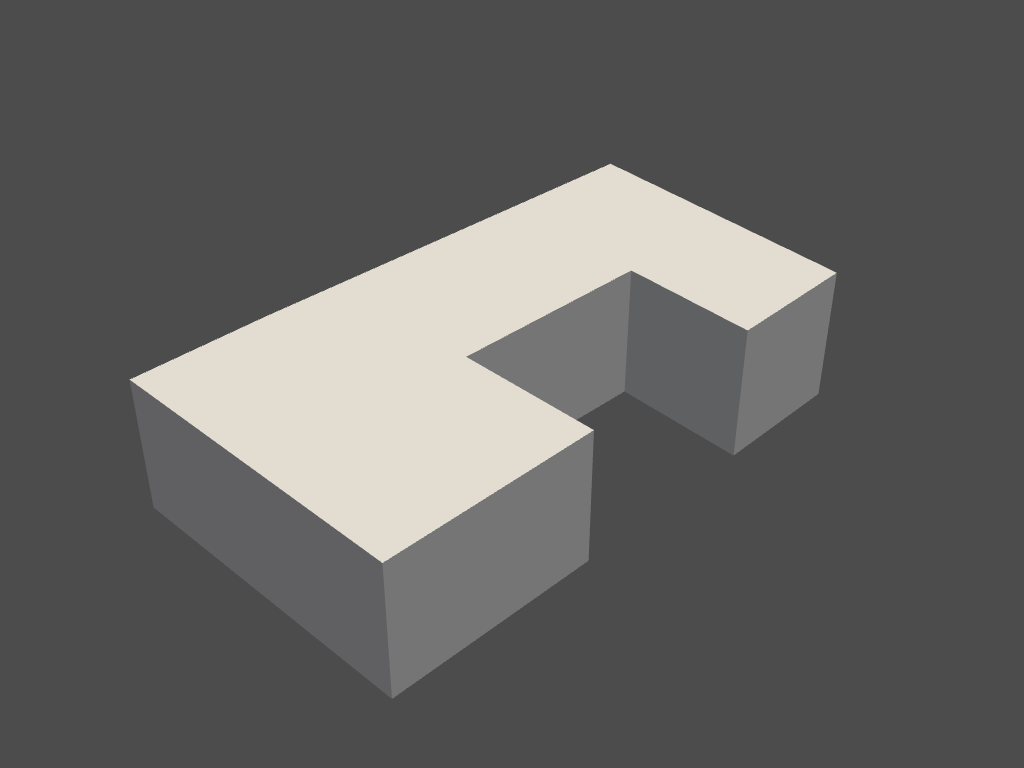

[(231.86749716538242, 138.59305366538243, 213.77890901538242),
 (36.06858815, -57.20585535, 17.98),
 (0.0, 0.0, 1.0)]

In [35]:
# convert trimesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# Visualize the mesh using pyvista plotter
#######

# initiating the plotter
p = pv.Plotter(notebook=True)


# adding the base mesh: light blue
p.add_mesh(tri_to_pv(mesh), color='white')

# plotting
p.show(use_ipyvtk=True)


#saving and plotting
png_path = os.path.relpath('../screenshots/mesh.png')
p.show(screenshot= png_path)

![mesh](../screenshots/mesh.png)

In [31]:
#start point array
mesh.vertices += np.array([0,0,-0.01])

## 2. Voxelize the Mesh

In [32]:
# initialize the base lattice
base_lattice = tg.lattice(mesh.bounds, unit=unit, default_value=1, dtype=int)

# check which voxel centroids is inside the mesh
interior_condition = mesh.contains(base_lattice.centroids)

# reshape the interior condition to the shape of the base_lattice
interior_array = interior_condition.reshape(base_lattice.shape)

# convert the interior array into a lattice
interior_lattice = tg.to_lattice(interior_array, base_lattice.minbound, base_lattice.unit)

print (enumerate(interior_lattice))

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

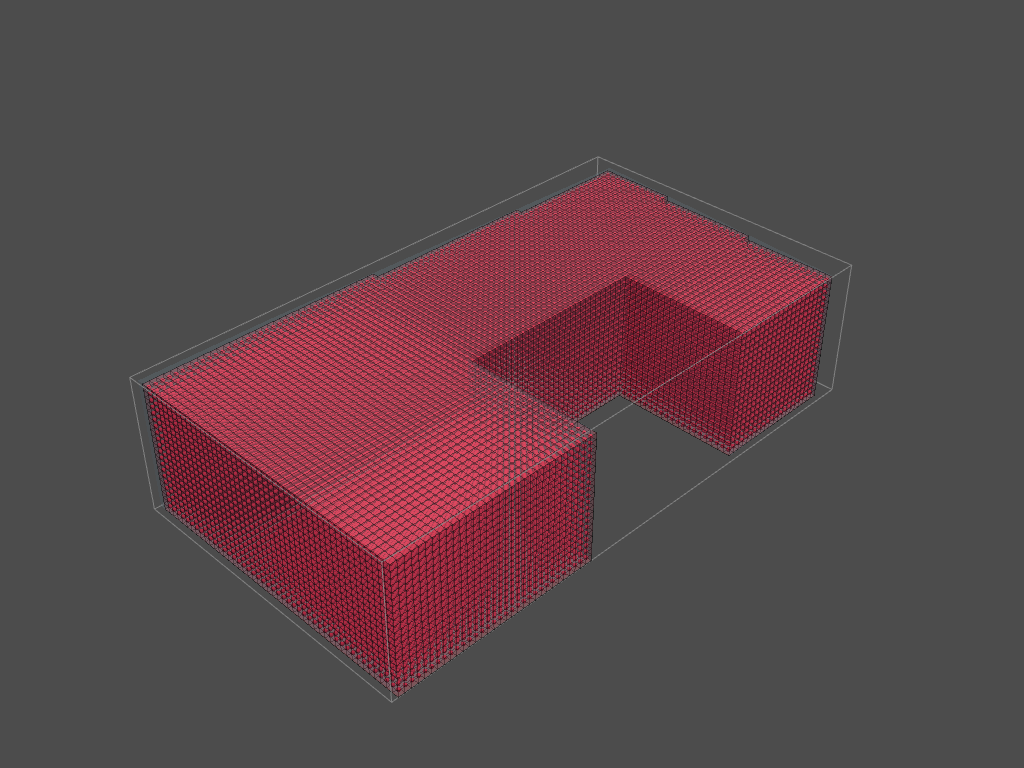

[(235.5051936291799, 141.90519277087301, 217.50519440404028),
 (36.0, -57.600000858306885, 18.000000774860382),
 (0.0, 0.0, 1.0)]

In [34]:
# convert trimesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# Visualize the voxelization using pyvista plotter
#####

# initiating the plotter
p = pv.Plotter(notebook=True)

# fast visualization of the lattice
interior_lattice.fast_vis(p)

# adding the base mesh: light blue
p.add_mesh(tri_to_pv(mesh), color='#abd8ff', opacity=0.1)

# plotting
p.show(use_ipyvtk=True)


#saving and plotting
png_path = os.path.relpath('../screenshots/ful_lattice.png')
p.show(screenshot= png_path)

![voxelized](../screenshots/volexlized.png)

## 3. Saving the lattice to CSV

In [10]:
csv_path = os.path.relpath('../data/voxelized_envelope_highres.csv')
interior_lattice.to_csv(csv_path)

### Credits

In [11]:
__author__ = "Shervin Azadi"
_editor_ = "PROJECT APIDAE"
_editor_mentor_ = "Shervin Azadi"
__license__ = "MIT"
__version__ = "1.0"
__url__ = "https://github.com/shervinazadi/spatial_computing_workshops"
__summary__ = "Spatial Computing Design Studio Workshop on Voxelization"